In [ ]:
import numpy as np
from scipy.io import loadmat
import os
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['SIR_CONFIG_DIR'] = "/content/gdrive/My Drive/"
%cd /content/gdrive/My Drive/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


### Different dimension of the pre-trained GLoVE embedding

In [ ]:
fileNames = ['glove.6B.50d.txt', 'glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.300d.txt']

accuracies = []
precisions = []
recalls = []
f1s = []

for file in fileNames:
    embeddings_dict = {}
    fpath = "./{}".format(file)
    with open(fpath, 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
            
    x_tr_glove, y_tr_glove, x_te_glove, y_te_glove = getTrainTestEmbeddings(train, test, embeddings_dict)
    
    logModel = LogisticRegression(C=10.0, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear')
    logModel.fit(x_tr_glove, y_tr_glove)
    logModelPreds = logModel.predict(x_te_glove)
    
    logScores = getScores(y_te_glove, logModelPreds)
    accuracies.append(logScores['accuracy'])
    precisions.append(logScores['precision'])
    recalls.append(logScores['recall'])
    f1s.append(logScores['f1'])

Text(0.5, 1.0, 'Performance measure of Logistic Classifier on different dimensional GLoVE embeddings')

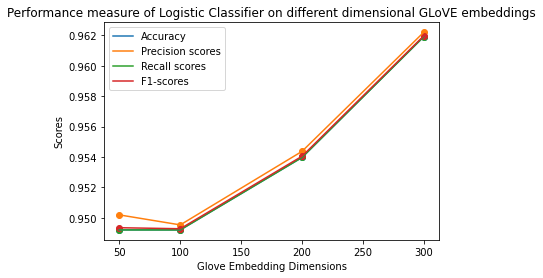

In [ ]:
glove_K = [50, 100, 200, 300]

plt.xlabel("Glove Embedding Dimensions")
plt.ylabel("Scores")

plt.scatter(glove_K, accuracies)
plt.plot(glove_K, accuracies)

plt.scatter(glove_K, precisions)
plt.plot(glove_K, precisions)

plt.scatter(glove_K, recalls)
plt.plot(glove_K, recalls)

plt.scatter(glove_K, f1s)
plt.plot(glove_K, f1s)

plt.legend(["Accuracy", "Precision scores", "Recall scores", "F1-scores"], loc="best")
plt.title("Performance measure of Logistic Classifier on different dimensional GLoVE embeddings")


### Q12)

The Graph for Dimension of the pre-trained GLoVE embedding used vs The resulting accuracy of the model can be seen above. <br>
From the graph on can infer that on increasing the dimnesion the resulting accuracy first decrease to some point and then becomes almost constant. This kind of behavior is expected as the number of training feature increase one also need to increase the amount of data to get better or equivalent result so as to learn the intra relation between the feature. But in our case the number of feature are the same therefore decreasing the performance of the model. 

In [ ]:
import umap.umap_ as umap

In [ ]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=e9f227aed4b5b2241ec28929a4aa16d8357501ac1b5cae76cee6152898c61062
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7b6d089b835b480c4dd4bc3634ab03af613b019ae3cfcfeef33edbf4393cb9da
  Stored in directory: /root/.cac

### Visualize GLoVE based Embedding 

In [ ]:
import umap.plot

In [ ]:
mapper = umap.UMAP().fit(x_train_glove)

Text(0.5, 1.0, 'Data visualisation on Root label level using UMAP(300 to 2 dim reduction)')

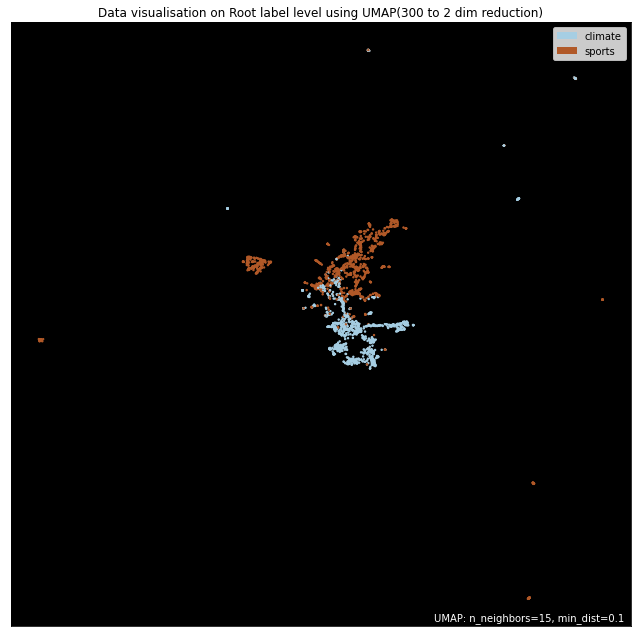

In [ ]:
labs = np.array(['climate' if label == 1 else 'sports' for label in y_train_glove])
umap.plot.points(mapper, labels=labs, color_key_cmap='Paired', background='black')
plt.title("Data visualisation on Root label level using UMAP(300 to 2 dim reduction)")


Text(0.5, 1.0, 'Data visualisation on Leaf label level using UMAP(300 to 2 dim reduction)')

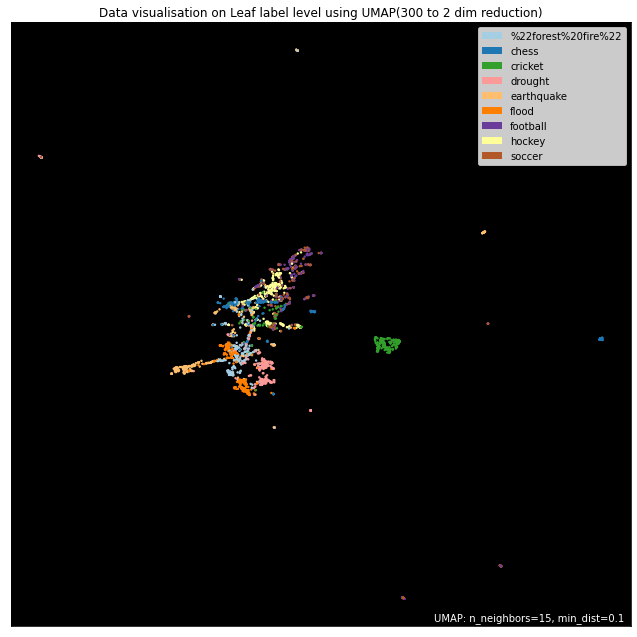

In [ ]:
mapper = umap.UMAP().fit(x_train_glove)
umap.plot.points(mapper, labels=train['leaf_label'], color_key_cmap='Paired', background='black')
plt.title("Data visualisation on Leaf label level using UMAP(300 to 2 dim reduction)")

Text(0.5, 1.0, 'Plotting random High dimensional data same as Glove with 10 random labels on 2-D plot')

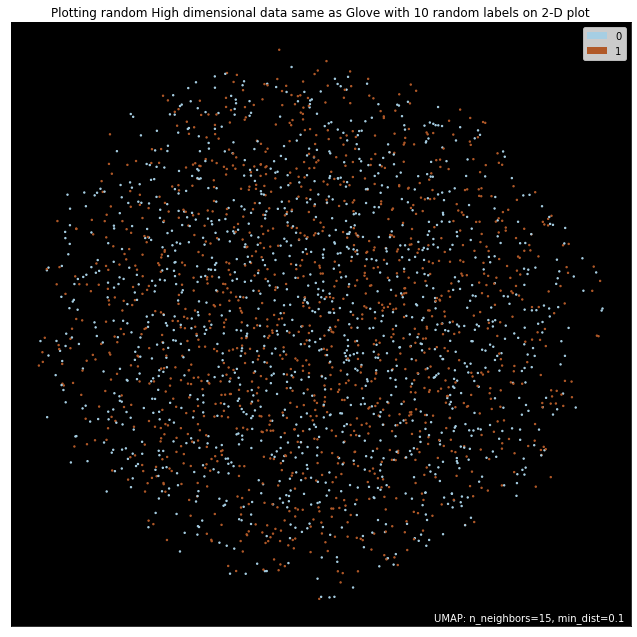

In [ ]:
rows = x_train_glove.shape[0]
cols = x_train_glove.shape[1]
randomLabels = np.random.randint(0, 2, rows, dtype=int)
randomVecs = np.random.rand(rows, cols)
for i in range(len(randomVecs)):
    randomVecs[i] = randomVecs[i]/np.linalg.norm(randomVecs[i], 2)
    
mapper = umap.UMAP().fit(randomVecs)
umap.plot.points(mapper, labels=randomLabels, color_key_cmap='Paired', background='black')

plt.title("Plotting random High dimensional data same as Glove with 10 random labels on 2-D plot")

### Q13).

As one can see below it is evident that the two cluster formed are almost seprable which also clear from the accuracy of trained model we are getting.

From the second graph we can see that the cluster formed from the leaf label are not seprable and having overlap with each other. Thus on reducing the dimension GLoVE embedding the accuracy is decreasing.

In the 3rd graph labels are randomly assigned to each of 1657 randomly generated sample of same dimension as GLoVE embedding . Here it can be seen that no clear clusters are there. This implies that some sort of ordering must exist and that all data under consideration by ML must follow some distribution in order to be classified.